## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
# -- ВАШ КОД ТУТ --

### Метрика ухудшилась, 2 кластера лучше

import pickle
import numpy as np
from sklearn.cluster import KMeans

# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])



model = KMeans(n_clusters=2).fit(X)
from sklearn.metrics import silhouette_score
score = silhouette_score(X, model.labels_)
print("Качество кластеризации (2 кластера) по метрике силуэтта %.3f" % score)

model = KMeans(n_clusters=4).fit(X)
from sklearn.metrics import silhouette_score
score = silhouette_score(X, model.labels_)
print("Качество кластеризации (4 кластера) по метрике силуэтта %.3f" % score)

Качество кластеризации (2 кластера) по метрике силуэтта 0.447
Качество кластеризации (4 кластера) по метрике силуэтта 0.442



### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [2]:
# -- ВАШ КОД ТУТ --

### Метрика ухудшилась очень сильно, 2 кластера лучше
from sklearn.metrics.cluster import adjusted_mutual_info_score
model = KMeans(n_clusters=2).fit(X)
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
print("Качество кластеризации (2 кластера) по метрике AMI %.3f" % score)


model = KMeans(n_clusters=4).fit(X)
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
print("Качество кластеризации (4 кластера) по метрике AMI %.3f" % score)


Качество кластеризации (2 кластера) по метрике AMI 0.929
Качество кластеризации (4 кластера) по метрике AMI 0.582



### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

1. Оптимальное количество кластеров - 3

cluster_num 1, metric 1105.8973781101085
cluster_num 2, metric 663.5712032768098
cluster_num 3, metric 374.6589714184058
cluster_num 4, metric 348.17052724059556
cluster_num 5, metric 323.0909288942993
cluster_num 6, metric 300.1038848603343
best cluster num: 3


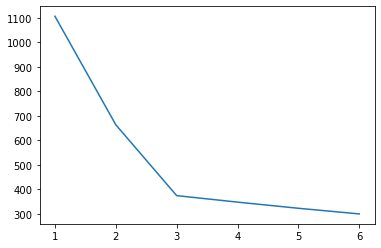

In [9]:
# -- ВАШ КОД ТУТ --


import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

df = pd.read_csv('clustering_hw.csv')
X = df.drop('y', axis=1)
y = df['y']

metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)
    
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()


3. Точки принадлежат разным кластерам


In [18]:
kmeans_model = KMeans(n_clusters=3, random_state=99).fit(X)

dots = [[5,8], [0,5]]
centroids = kmeans_model.cluster_centers_

for dot in dots:
    distance = []
    for centroid in centroids:
        distance.append(euclidean(dot, centroid))
    print(f'Точка {dot} принадлежит кластеру {distance.index(max(distance))}')
        




Точка [5, 8] принадлежит кластеру 2
Точка [0, 5] принадлежит кластеру 1


4. AMI = 0.970

In [11]:
kmeans_model = KMeans(n_clusters=3, random_state=99).fit(X)
score = adjusted_mutual_info_score(y, kmeans_model.labels_, average_method='arithmetic')
print("Качество кластеризации (3 кластера) по метрике AMI %.3f" % score)

Качество кластеризации (3 кластера) по метрике AMI 0.970


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)